In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from imblearn.over_sampling import SMOTE
from sklearn import svm
from nltk import ngrams
from sklearn.model_selection import train_test_split
from nltk.tokenize import  word_tokenize

In [46]:
path = (r"C:\Users\namit\OneDrive\Desktop\urldata.csv\urldata.csv")

In [47]:
df = pd.read_csv(path)
df = df.iloc[: , 1:]

In [48]:
print(df.shape)

(450176, 3)


In [49]:
df.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [51]:
df.describe()

,result
count,450176.000000
mean,0.231994
std,0.422105
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [52]:
df.columns

Index(['url', 'label', 'result'], dtype='object')

In [53]:
print(df['label'].unique())
print(df['result'].unique())

['benign' 'malicious']
[0 1]


In [54]:
df.isnull().sum()

url       0
label     0
result    0
dtype: int64

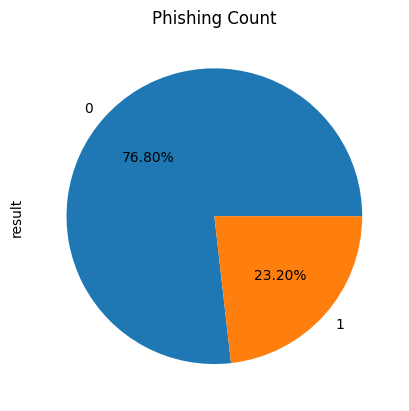

In [58]:
df['result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Phishing Count')
plt.show()

In [55]:
## generating word  frequency
def gen_fr(text):
    li =[]
    for i in text.split():
        li.extend(i)
    li=pd.Series(li).value_counts()
    return li

In [42]:
def token(text):
    li=[]
    for i in text.split():
        li.extend(i)
    li = pd.Series(li)
    return li    
        

In [56]:
gen_fr(df['url'].str)

/                                                                                                                                                  365
.                                                                                                                                                   33
http://security-apps.                                                                                                                               12
http://mobil-apps.                                                                                                                                  12
http://sms-trust.                                                                                                                                   12
                                                                                                                                                  ... 
https://www.billboard.com/news/lady-antebellum-headed-for-second-no-1-album-1005353332.story  

In [57]:
token(df['url'].str)

0                                    https://www.google.com
1                                   https://www.youtube.com
2                                  https://www.facebook.com
3                                     https://www.baidu.com
4                                 https://www.wikipedia.org
                                ...                        
450864          http://ecct-it.com/docmmmnn/aptgd/index.php
450865    http://faboleena.com/js/infortis/jquery/plugin...
450866    http://faboleena.com/js/infortis/jquery/plugin...
450867                               http://atualizapj.com/
450868    http://writeassociate.com/test/Portal/inicio/I...
Length: 450869, dtype: object